# MO431A - Tarefa 1

Importanto bibliotecas necessárias.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

## 1 Importando a matriz do arquivo dados.npy para X

In [69]:
X = np.load('dados.npy')

## 2 Imprimindo as imagens dos 3 primeiros dígitos

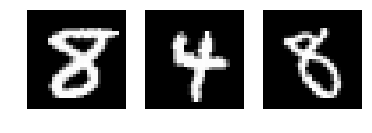

In [70]:
for i in range(3):
    imagem = X[i]
    imagem = np.reshape(imagem, (28, 28))
    plt.subplot(1, 3, i+1)
    plt.imshow(imagem, 'gray')
    plt.axis('off')
plt.show()

## 3 Aplicando fatoração SVD em X

* **Normalizando**

In [71]:
Xnorm = X - np.mean(X, axis=0)

* **Aplicando em full matrix**

In [72]:
U, D, Vt = np.linalg.svd(Xnorm, full_matrices=True)
print(f'Tamanho das matrizes: U= {U.shape}, D= {D.shape}, Vt = {Vt.shape}.')

Tamanho das matrizes: U= (10500, 10500), D= (784,), Vt = (784, 784).


* **Aplicando em compacta**

In [73]:
Uc, Dc, Vtc = np.linalg.svd(Xnorm, full_matrices=False)
print(f'Tamanho das matrizes: U= {Uc.shape}, D= {Dc.shape}, Vt = {Vtc.shape}.')

Tamanho das matrizes: U= (10500, 784), D= (784,), Vt = (784, 784).


## 4 Aplicando SVD truncado

A função considera dados nas colunas, portanto é preciso utilizar a matriz transposta de X para calcular o SVD truncado, e depois utilizar a tranposta de X do SVD truncado.

In [74]:
#Xnormt = Xnorm.T
UDtrunc = TruncatedSVD(n_components=100)
Proj = UDtrunc.fit_transform(Xnorm)
#Proj = UDtrunct.components_.T
print(f'Tamanho da matriz projetada = {Proj.shape}.')
print(f'Tamanho da matriz Vtr = {UDtrunc.components_.shape}.')

Tamanho da matriz projetada = (10500, 100).
Tamanho da matriz Vtr = (100, 784).


In [75]:
Xrec = Proj @ UDtrunc.components_
print(f'Tamanho da matriz reconstruída = {Xrec.shape}.')

Tamanho da matriz reconstruída = (10500, 784).


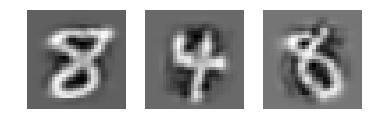

In [76]:
for i in range(3):
    imagem = Xrec[i]
    imagem = np.reshape(imagem, (28, 28))
    plt.subplot(1, 3, i+1)
    plt.imshow(imagem, 'gray')
    plt.axis('off')
plt.show()

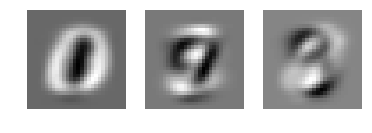

In [77]:
for i in range(3):
    imagem = UDtrunc.components_[i]
    imagem = np.reshape(imagem, (28, 28))
    plt.subplot(1, 3, i+1)
    plt.imshow(imagem, 'gray')
    plt.axis('off')
plt.show()

In [78]:
print(f'Necessitamos {D[D>1].shape[0]} dimensões para singular values maiores que 1')

Necessitamos 671 dimensões para singular values maiores que 1


In [80]:
i=0
while np.cumsum(D/np.sum(D))[i]<0.8:
    i=i+1
print(f'Necessitamos {i} dimensões para obter 80% da variância.')

Necessitamos 234 dimensões para obter 80% da variância.


In [81]:
i=0
while np.cumsum(D/np.sum(D))[i]<0.95:
    i=i+1
print(f'Necessitamos {i} dimensões para obter 95% da variância.')

Necessitamos 425 dimensões para obter 95% da variância.
